In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#importing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#loading data
data = np.loadtxt("/content/drive/MyDrive/sc_curation_intern_assignment/data.txt", delimiter=',', dtype=str)
print(data[0])

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_sd' 'texture_sd' 'perimeter_sd' 'area_sd' 'smoothness_sd'
 'compactness_sd' 'concavity_sd' 'concave_points_sd' 'symmetry_sd '
 'fractal_dimension_sd' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst ' 'fractal_dimension_worst']


In [16]:
#converting to dataframe and answering problem 1 
df = pd.DataFrame(data)
print(len(df))
new_df = df.replace('', np.nan)
new_df = new_df.dropna(axis = 0)
new_df = new_df.reset_index(drop = True)
print(len(new_df))
print((570-504)/569)
###### problem 1: 66 samples have missing values. 11.6 % of the original samples have missing values. I imputated the values using average of the columns.  

570
504
0.11599297012302284


In [17]:
#changing names of columns
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [18]:
#Imputating the empty values of numerical features with averages
new_df1 = df.drop(['id'], axis=1)
new_df1 = new_df1.drop(['diagnosis'], axis=1)
new_df1 = new_df1.replace('', np.nan)
new_df1 = new_df1.astype(float)
new_df1 = new_df1.fillna(new_df1.mean())
# print(new_df1)
print(len(new_df1))

569


In [19]:
#### Problem 2 Summary Statictics
pd.set_option('max_columns', 30)
diagnosis_M = df[df["diagnosis"]=="M"]
print(len(diagnosis_M))
diagnosis_B = df[df["diagnosis"]=="B"]
print(len(diagnosis_B))
new_df1.describe()

###### There are 212 patients with Malignant type Cancer and 357 patients with Benign type Cancer. The table below shows the average, standard deviation, min and max values.   
###### The 25, 50 and 75 percentiles are also shown. For example: 25% of the radius_mean is 11.84 or less. Thus it can be inferred that the 50% values are the median.  

212
357


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_sd,texture_sd,perimeter_sd,area_sd,smoothness_sd,compactness_sd,concavity_sd,concave_points_sd,symmetry_sd,fractal_dimension_sd,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.175410,19.289649,91.969033,659.519697,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.439312,4.301036,24.298981,338.514087,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.840000,16.170000,75.170000,432.000000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.590000,18.840000,86.240000,575.300000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.710000,21.800000,104.100000,758.600000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


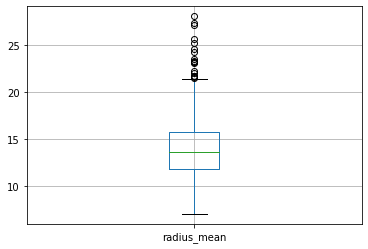

In [20]:
###### Problem 3 box plots
boxplot = new_df1.boxplot(column=['radius_mean'])

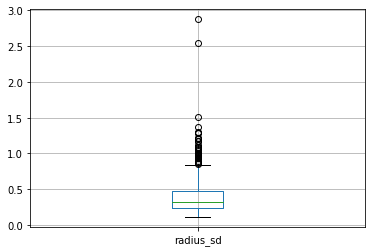

In [21]:
boxplot = new_df1.boxplot(column=['radius_sd'])

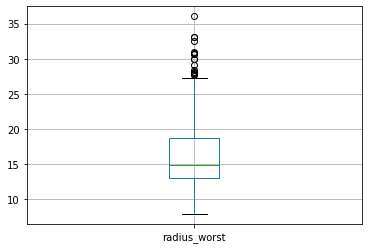

In [22]:
boxplot = new_df1.boxplot(column=['radius_worst'])

In [23]:
#### Problem 4, the scales are not in a similar range looking at the boxplots of the three radius variables. Hence, I decided to apply Min-Max normalization to every column. 

In [24]:
# Normalizing Data
def min_max_scaling(df):
    df_dup = df.copy()
    for column in df_dup.columns:
        df_dup[column] = (df_dup[column] - df_dup[column].min()) / (df_dup[column].max() - df_dup[column].min())       
    return df_dup
df_norm = min_max_scaling(new_df1)
# print(df_norm)

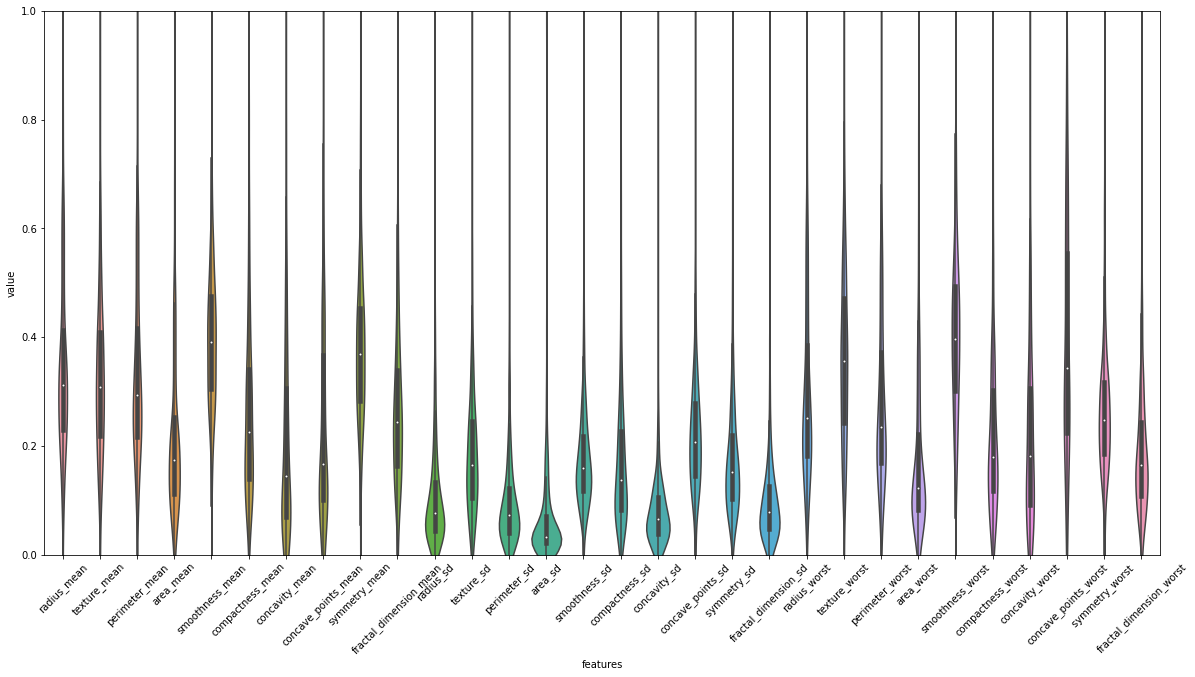

In [26]:
###### Using a violin plot to visualize the distriibution of normalized data (problem 2)
plt.figure(figsize=(20,10))
sns.violinplot(data=df_norm)
plt.xticks(rotation= 45)
plt.ylim(0,1)
plt.xlabel("features")
plt.ylabel("value")
plt.show()

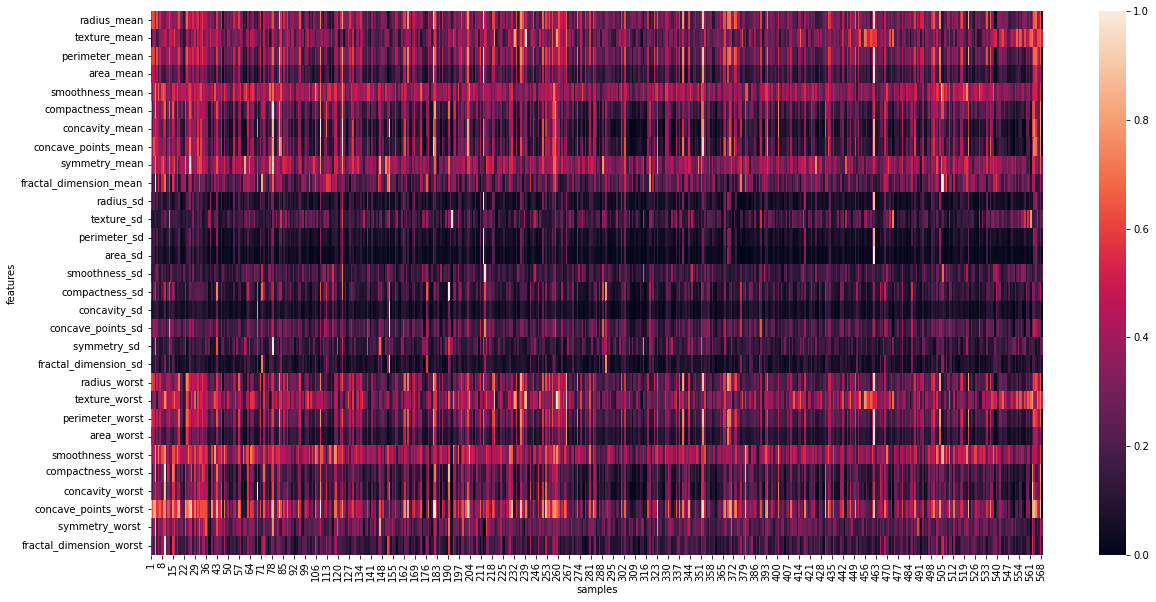

In [28]:
###### Problem 5 - heatmap
df_norm_transposed = df_norm.transpose()
plt.figure(figsize=(20,10))
p1 = sns.heatmap(df_norm_transposed)
plt.xlabel("samples")
plt.ylabel("features")
plt.show()

###### It is quite clear that the variables that have sd as a suffix have values closer to zero after normalization from the heatmap. It can be attributed to the fact that the original dataset also had sd values closer to zero. 


In [29]:
###### Problem 5 Kmeans Clustering
kmeans_kwargs = {
"init": "random",
"n_init": 300,
"random_state": 1}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_norm)
    sse.append(kmeans.inertia_)

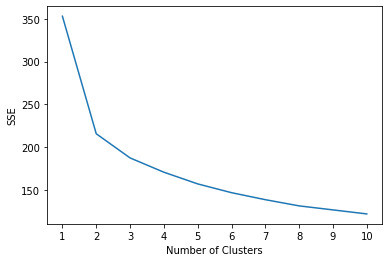

In [30]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#####Since the (Sum of Squared Errror) SSE plot bends at 2, 2 clusters should be sufficient for Kmenas which is in tune with our 2 labels - Malignant and Benign. 

In [31]:
kmeans = KMeans(init="random", n_clusters=2, n_init=300, random_state=1)

In [32]:
kmeans.fit(df_norm)

KMeans(init='random', n_clusters=2, n_init=300, random_state=1)

In [33]:
df["Cluster"] = kmeans.labels_
# print(df["diagnosis"].head(20))
# print(df["Cluster"].head(20))
filtered_values = np.where((df['diagnosis']=="M") & (df['Cluster']==1))
filtered_values1 = np.where((df['diagnosis']=="B") & (df['Cluster']==0))
print(len(filtered_values[0]))
print(len(filtered_values1[0]))

#### 32 malignant patients and 9 benign patients were labelled wrong. The label given by Kmeans "1" based on the features does not match the manual annotation "M" in the diagnosis column. 
#### We might need to perform dimensional reduction of the features to have Kmeans cluster the samples correctly.

180
348


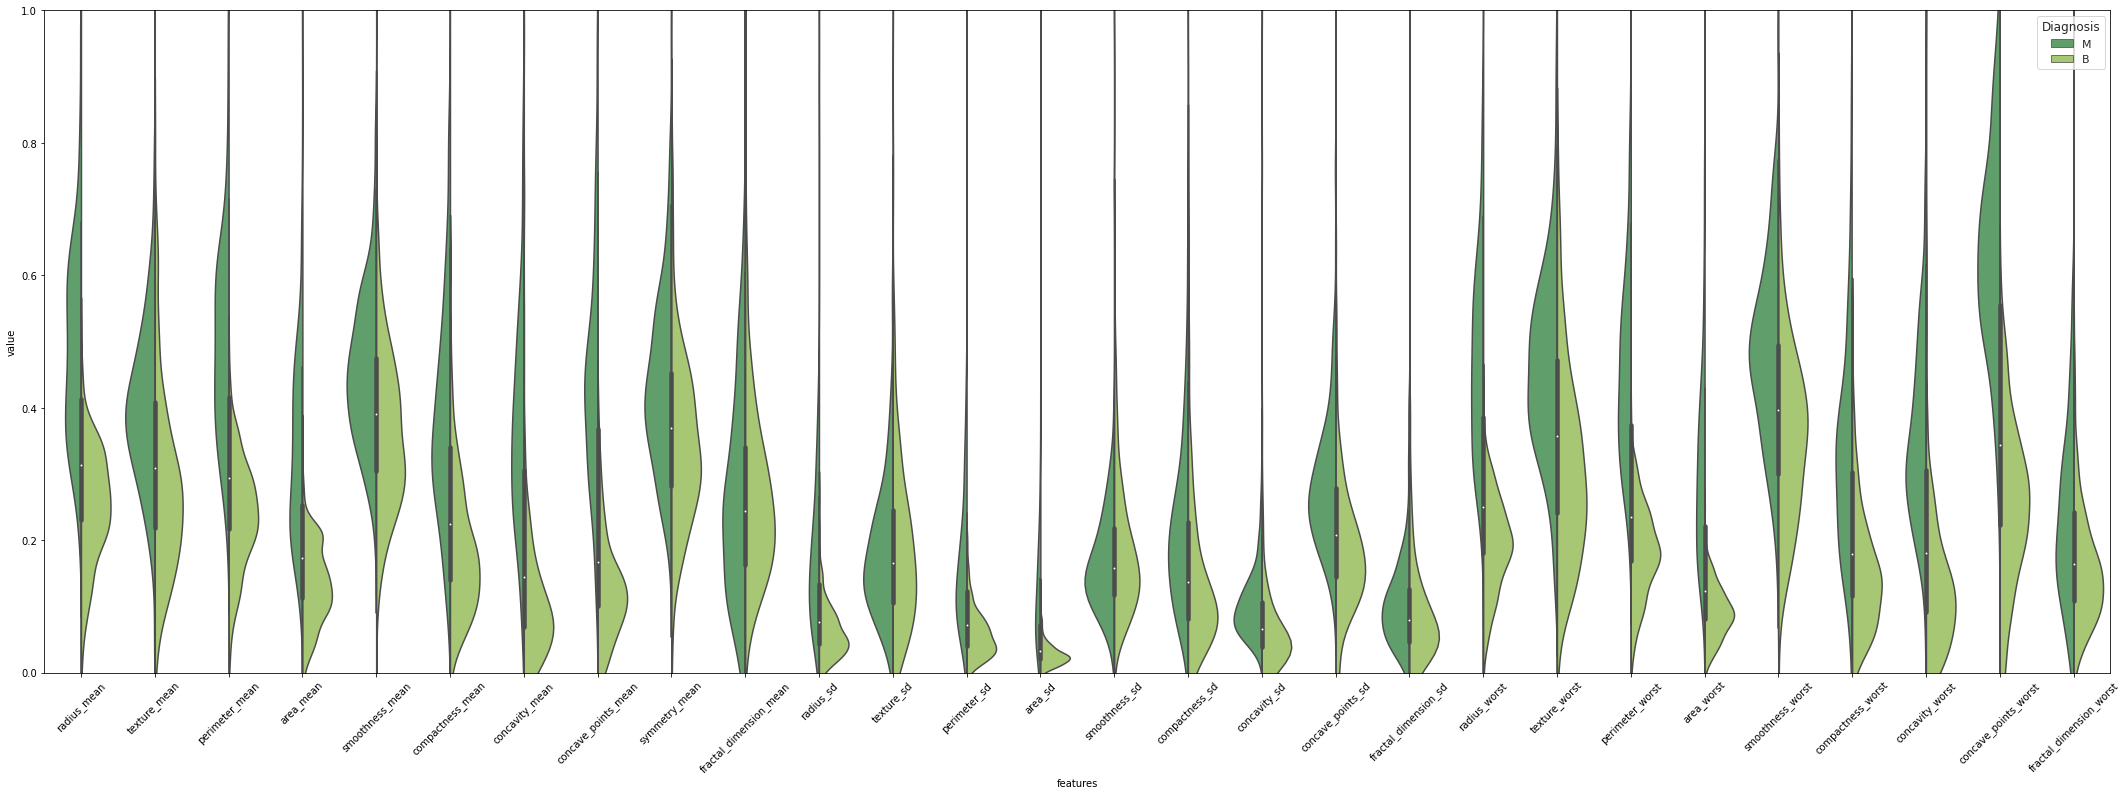

In [34]:
###### problem 6. I generated a split violin plot to see the distribution differences between Malignant and Benign tumors for all the features.
df_norm["Diagnosis"] = df["diagnosis"]
df_long = df_norm.melt(id_vars = ['Diagnosis'], value_vars = ["radius_mean",
"texture_mean",
"perimeter_mean",
"area_mean",
"smoothness_mean",
"compactness_mean",
"concavity_mean",
"concave_points_mean",
"symmetry_mean",
"fractal_dimension_mean",
"radius_sd",
"texture_sd",
"perimeter_sd",
"area_sd",
"smoothness_sd",
"compactness_sd",
"concavity_sd",
"concave_points_sd", 
"fractal_dimension_sd",
"radius_worst",
"texture_worst",
"perimeter_worst",
"area_worst",
"smoothness_worst",
"compactness_worst",
"concavity_worst",
"concave_points_worst",
"fractal_dimension_worst"
], var_name = "features", value_name = "value")
fig,ax = plt.subplots(figsize = (30,10))
sns.set_theme(style = "whitegrid")
sns.violinplot(ax = ax, data = df_long, x = "features", y = "value", hue = "Diagnosis", palette = "summer", split = True)
plt.tight_layout()
plt.xticks(rotation= 45)
plt.ylim(0,1)
plt.show()


In [35]:
###### Problem 7: Performing PCA

data = np.loadtxt("/content/drive/MyDrive/sc_curation_intern_assignment/data.txt", delimiter=',', dtype=str)
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
new_df1 = df.drop(['id'], axis=1)
new_df1 = new_df1.drop(['diagnosis'], axis=1)
new_df1 = new_df1.replace('', np.nan)
new_df1 = new_df1.astype(float)
new_df1 = new_df1.fillna(new_df1.mean())
new_df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_sd,texture_sd,perimeter_sd,area_sd,smoothness_sd,compactness_sd,concavity_sd,concave_points_sd,symmetry_sd,fractal_dimension_sd,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,17.99000,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,20.57000,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,19.69000,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,14.17541,20.38,77.58,659.519697,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,20.29000,14.34,135.10,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_df1)
scaled_data = scaler.transform(new_df1)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [38]:
x_pca = pca.transform(scaled_data)

In [39]:
df["label"] =  (df['diagnosis'] == "M") 
df["label"] = df['label'].astype(int)
# df.head(20)

Text(0, 0.5, 'Second Principal Component')

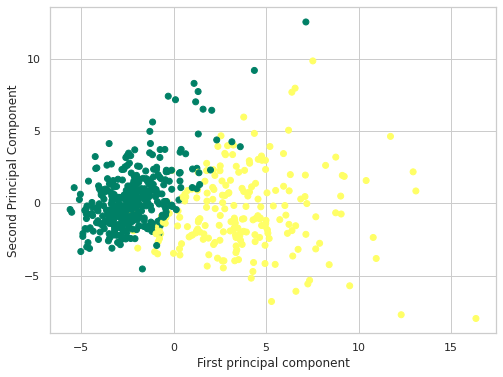

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['label'],cmap='summer')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [41]:
print(pca.explained_variance_ratio_)
#### The first principal component explains 44.06% of the variation

[0.44059158 0.1884189  0.09395759 0.06602229 0.05489113 0.04024915
 0.02239648 0.01595572 0.01416221 0.01166653]


In [42]:
#### PCA is used to visualize multidimensional data as 2 or three dimensional plots. It is used to reduce the number of features needed for Machine Learning algorithms.

Text(0, 0.5, 'Variance')

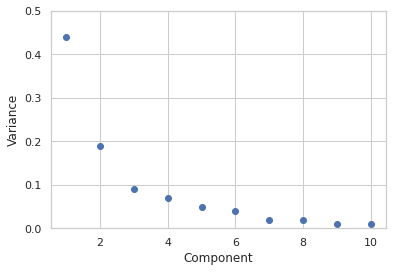

In [43]:
#### Scree plot
list_1 = [0.44, 0.19, 0.09, 0.07, 0.05, 0.04, 0.02, 0.02, 0.01, 0.01 ]
list_2 = [1,2,3,4,5,6,7,8,9,10]
plt.scatter (list_2, list_1)
plt.ylim(0,0.5)
plt.xlabel("Component")
plt.ylabel("Variance")
###The scree plot shows that the first 5 components explain 84% of the variation. We can try Kmeans clustering for example again with just the first five components for a higher accuracy. 